# Python for Data Science 2022
*Author: Satchit Chatterji (satchit.chatterji@gmail.com)*
## Case study 3: Analysis of wine data!
> Today's question: **What does all this data about wine tell us?**

Today, we look at several possible analyses we can do once we've got a dataset selected or given to us. In this case, we're looking at data about reviews of Portuguese wines. There's a lot we can do, so let's focus this week on data cleaning, exploring, and plotting. The dataset was found on Kaggle: 

https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadswinecsv

However, I've also made this availible on my GitHub, specifically since we've already covered how to read tables from websites via Pandas.

#### Learning outcomes:
- Data cleaning
- Correlations
- Plotting
    - Heatmaps
    - Line plots
    - Pie charts
    - Histograms
    - Scatter Plots
- Outlier detection
- Polynomial fitting + Gaussian fitting


## Load libraries

In [1]:
import numpy as np                  # common numerical methods
import pandas as pd                 # data manipulation (eg dataframes)
import matplotlib.pyplot as plt     # plotting functions
import seaborn as sns               # plotting functions

## Load Data

As mentioned in the intro, the dataset was found on Kaggle, and is provided here via a table on GitHub.

> Q) What Pandas function would you use if you had the csv file (e.g. downloaded from Kaggle) instead of the code below to load in the data?

In [2]:
dfs = pd.read_html("https://github.com/satchitchatterji/PythonForDataScience/blob/main/lecture3/wine.csv")

_What do we do next?_ 

### >>> **Look at the raw data!** <<<

In [3]:
df = dfs[0]
df

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,NaN,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6
1,NaN,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6
2,NaN,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7
3,NaN,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10,5
4,NaN,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,NaN,8.1,0.34,0.28,7.5,0.040,70.0,230.0,0.99558,3.14,0.55,9.8,6
2033,NaN,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6
2034,NaN,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.2,7
2035,NaN,7.7,0.28,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.6,5


### Clean up data
There seems to be some column at the start that doesn't have any meaning to us, that only seems to contain NaN values, and is probably a problem with reading in the data from GitHub. So, we first drop the unneeded columns.

In [4]:
df = df.drop(columns=["Unnamed: 0"])

Look at the data again, and explore and verify the values and datatypes by eye...

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10,5
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12,6


In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,quality
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,6.825626,0.266568,0.323201,6.277590,0.042211,34.718949,136.945508,1.586169,3.186348,0.481055,5.929799
std,0.753302,0.076738,0.094378,4.867284,0.009973,15.215444,41.424123,7.292762,0.138701,0.098560,0.845931
min,4.400000,0.080000,0.000000,0.700000,0.012000,3.000000,21.000000,0.987110,2.790000,0.220000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,24.000000,107.000000,0.991520,3.090000,0.410000,5.000000
50%,6.800000,0.260000,0.310000,5.300000,0.042000,34.000000,133.000000,0.993500,3.180000,0.470000,6.000000
75%,7.300000,0.310000,0.380000,9.400000,0.049000,45.000000,166.000000,0.995800,3.280000,0.540000,6.000000
max,8.800000,0.485000,0.570000,20.800000,0.071000,78.000000,253.000000,100.196000,3.560000,0.760000,9.000000


In [7]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
dtype: object

### Try to fix alcohol dtype
Wait! The 'alcohol' series seems to be incorrectly read in as an 'object' type instead of a float. Let's try and fix that with casting...

In [8]:
df['alcohol'] = df['alcohol'].astype(float)

ValueError: ignored

We get an error! Whenever we get an error, we read the error and not run from it. The main error, the `ValueError: could not convert string to float: '9.533.333.333'` suggests that there exists a value of `9.533.333.333` somewhere in this column. Perhaps someone wanted to write 9.5333 and something went wrong in the reading or writing or uploading of this dataset when they created it. Let's see if this is really true, and if there exist other problemmatic values.

In [9]:
df['alcohol'].unique()

array(['10.5', '8.8', '9.6', '10', '12', '11', '8.9', '10.9', '9.5',
       '10.7', '9.4', '9', '10.6', '8.7', '9.1', '9.3', '12.2', '9.7',
       '10.2', '12.3', '12.7', '11.4', '12.4', '8.5', '12.5', '11.2',
       '11.5', '11.8', '10.4', '10.1', '13.1', '11.3', '9.2', '12.8',
       '10.8', '9.8', '12.6', '11.7', '9.9', '12.9', '12.1', '13.3',
       '8.6', '13.4', '11.6', '10.3', '11.1', '11.45', '13.6',
       '9.533.333.333', '13.5', '1.093.333.333', '13', '11.9', '13.05',
       '11.94', '1.096.666.667', '14.2', '1.053.333.333', '12.05',
       '9.633.333.333', '9.55', '12.75', '13.2', '8.4', '1.106.666.667',
       '11.05', '10.55', '1.163.333.333', '9.733.333.333', '13.7',
       '1.133.333.333', '1.143.333.333', '13.9', '1.206.666.667', '11.75',
       '14', '11.35', '11.65', '10.98', '1.046.666.667', '1.136.666.667',
       '1.289.333.333'], dtype=object)

There are quite a few problemmatic values. We can use Panda's `replace` function to replace the erroneous values to something that, later on, we can cast into floats. In this case, it seems like we can do this just by doing the following:
> Create a dictionary to store the incorrect-correct value pairs (remeber, the `replace` function needs this kind of dictionary as input).
> If the value's string length is greater than 5:
>> Save a truncated string (first 5 characters) as the correct version of the string.

We can then directly input this into the `replace` function and cast the series into floats. We verify this with `dtypes`.

In [10]:
clean_vals = {}

for val in df['alcohol'].unique():
    if len(val)>5:
        clean_val = val[:5]
        clean_vals[val] = clean_val

clean_vals

{'9.533.333.333': '9.533',
 '1.093.333.333': '1.093',
 '1.096.666.667': '1.096',
 '1.053.333.333': '1.053',
 '9.633.333.333': '9.633',
 '1.106.666.667': '1.106',
 '1.163.333.333': '1.163',
 '9.733.333.333': '9.733',
 '1.133.333.333': '1.133',
 '1.143.333.333': '1.143',
 '1.206.666.667': '1.206',
 '1.046.666.667': '1.046',
 '1.136.666.667': '1.136',
 '1.289.333.333': '1.289'}

In [11]:
df['alcohol'] = df['alcohol'].replace(clean_vals)
df['alcohol'] = df['alcohol'].astype(float)

In [12]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Look for other problems in the dataset

When cleaning data like this, it is often specific to the dataset, and is unclear until you dig into the raw data and verify that this makes sense to you as a human. One other thing you can do to look for dataset issues is to plot it. Often, we expect **normal distributions** _everywhere_ in real-world datasets. So, if we plot a histogram or line plot, we should see something that looks like a normal distribution. 

**NOTE**: In this case, it would be better to use histograms instead of lineplots.

> Q) Why are histograms better here?

> Q) How would you implement histograms instead of line plots in the following code block?

> Q) How else could you look for problems? What plots may be useful here?

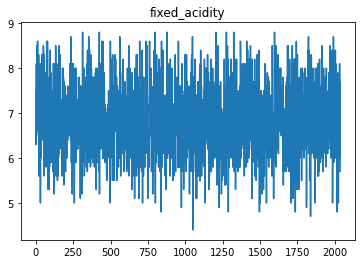

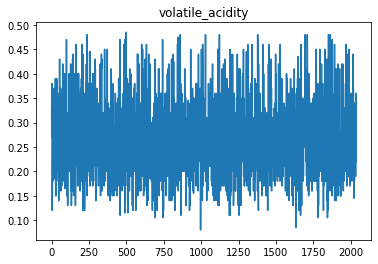

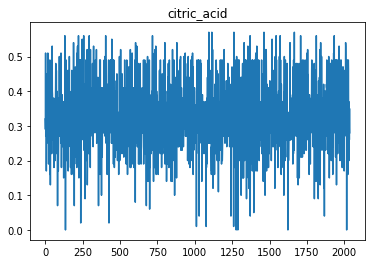

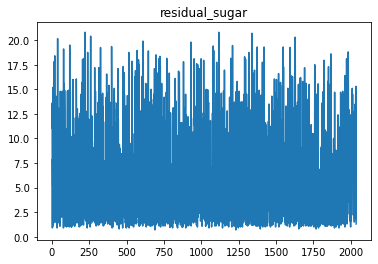

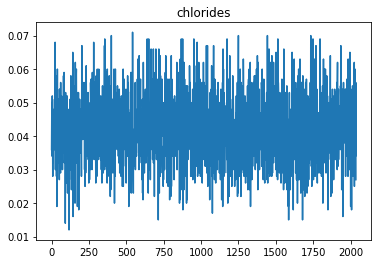

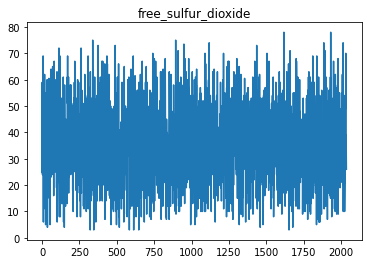

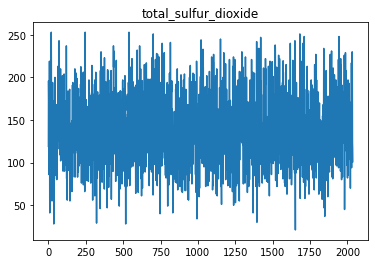

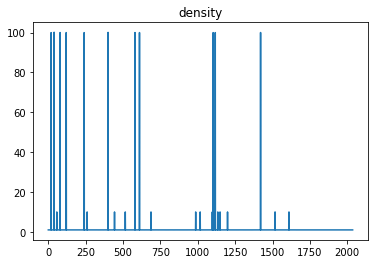

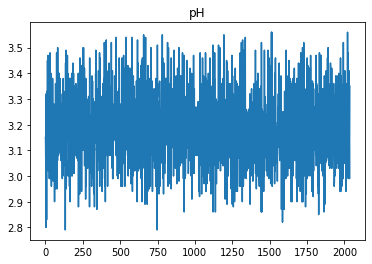

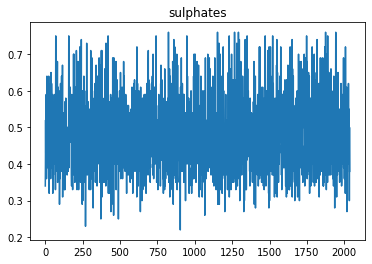

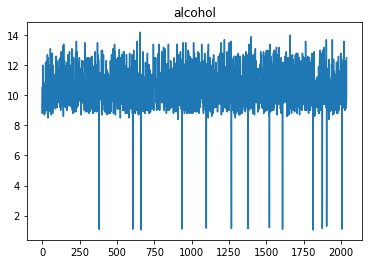

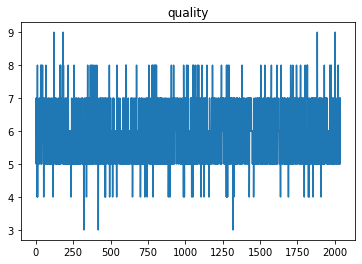

In [13]:
for col in df.columns:
    df[col].plot()
    plt.title(col)
    plt.show()

### Fix densities: problem with data collection

We see that all but the `density` and `alcohol` plots look like they are more or less normal. Perhaps the alcohol data include low- or zero-alcohol wines. So for now, since we don't have any other information about those wines, let us leave them be. 

For the densities, it seems as if there are measurements of three magnitudes: those around 1, those around 10 and those around 100. Thus, we can hypothesize that they were recorded at three different scales, and trust that these values are correct when taking their scales into account. 

With the knowledge that water has density 1 g/cm^3, we can convert values that of the other two scales down to the range [0,1].

> Q) In the cell block below, why are the thresholds 15/1.5 and not 10/1?

> When you're cleaning data, *always* record and report your steps and hypotheses. We always look for good, reproducable steps -- if someone had the same dataset but not your code, they should be able to recreate your results.

In [14]:
high_densities_idx = df.loc[df['density']>15].index
df['density'].iloc[high_densities_idx] /= 100

high_densities_idx = df.loc[df['density']>1.5].index
df['density'].iloc[high_densities_idx] /= 10

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


We now see that a plot of densities looks normal! This is a good sign!

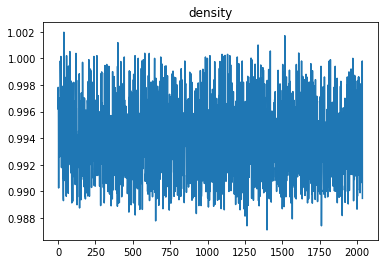

In [15]:
df['density'].plot()
plt.title('density')
plt.show()

## Plotting 1: Heatmaps: Visualise correlations

A first step to look for patterns in the data is to look for correlations between variables. So, we use the `corr` function offered by Pandas DataFrames. Simple, right?

In [16]:
corr = df.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.072492,0.249106,0.058966,0.081238,-0.037019,0.054733,0.224633,-0.401330,-0.001350,-0.042632,-0.052978
volatile_acidity,-0.072492,1.000000,-0.140056,0.075369,-0.009139,-0.045375,0.094061,-0.003792,-0.012521,-0.012369,0.081960,-0.121783
citric_acid,0.249106,-0.140056,1.000000,0.047460,0.028745,0.082710,0.104062,0.079937,-0.115834,0.052228,0.018044,0.029147
residual_sugar,0.058966,0.075369,0.047460,1.000000,0.261650,0.345176,0.416983,0.842026,-0.189756,-0.039880,-0.400917,-0.132507
chlorides,0.081238,-0.009139,0.028745,0.261650,1.000000,0.159435,0.385106,0.498509,-0.041580,0.071679,-0.478510,-0.299821
free_sulfur_dioxide,-0.037019,-0.045375,0.082710,0.345176,0.159435,1.000000,0.637607,0.342201,-0.020826,0.028628,-0.237835,-0.012829
total_sulfur_dioxide,0.054733,0.094061,0.104062,0.416983,0.385106,0.637607,1.000000,0.557758,-0.010027,0.135117,-0.398420,-0.182777
density,0.224633,-0.003792,0.079937,0.842026,0.498509,0.342201,0.557758,1.000000,-0.093086,0.086481,-0.666677,-0.321972
pH,-0.401330,-0.012521,-0.115834,-0.189756,-0.041580,-0.020826,-0.010027,-0.093086,1.000000,0.108248,0.106529,0.094596
sulphates,-0.001350,-0.012369,0.052228,-0.039880,0.071679,0.028628,0.135117,0.086481,0.108248,1.000000,-0.075431,0.026220


This correlation matrix is a good first step -- we see some interesting numbers, but not much else. Instead, we can use a heatmap (a grid that is colored according to a specific value in a matrix/array) to better visualise these results. We use seaborn's `heatmap` function for this. The arguments `cmap="coolwarm"` assigns a coloring system for the grid,  `annot=True` adds annotations (i.e. numbers in the grid) and `fmt="0.2f"` tells it to format the values with two numbers after the decimal place (look at documentation for formatting rules). 

We see some correlations that make sense to us intuitively: density and alcohol are negatively correlated, and density and residual sugar is positively correlated. It also seems like the reviewers liked wines that were higher proof too!

>Q) Why does the diagonal only consist of ones?

>Q) What other colormaps can be applicable here?

>Q) How would you annotate this grid with large numbers? How would you format them using scientific notation rules? 

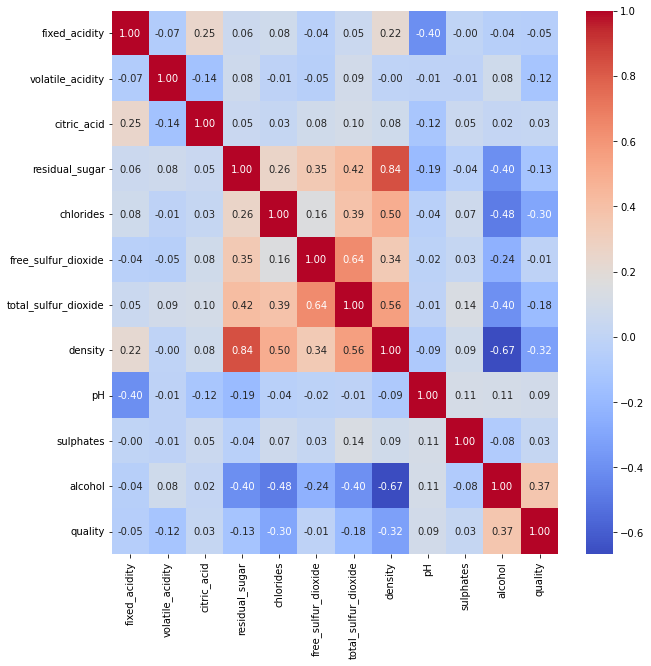

In [17]:
figure = plt.figure(figsize=(10,10)) # create a larger figure size than default
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt="0.2f")

## Plotting 2: Line plots: Understanding correlations

The correlations above only correspond to *linear* correlations: i.e. these relationships can be modelled with straight lines of the form $y=ax+b$. However, real-world relationships can be much more complex, and that will not be properly represented by linear correlation values. For example, we can plot `quality` and each of the other columns in the data frame. We see linear correlations when we expect to see them, but we may see other relationships too.

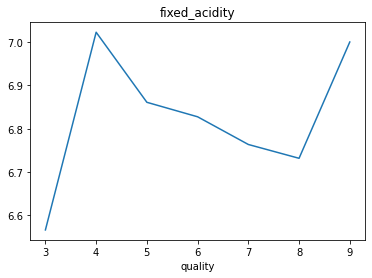

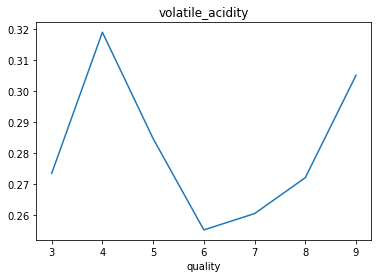

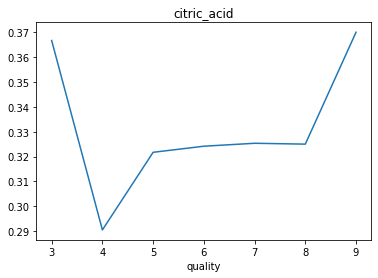

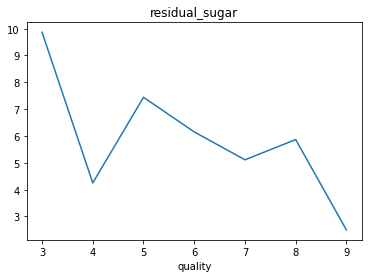

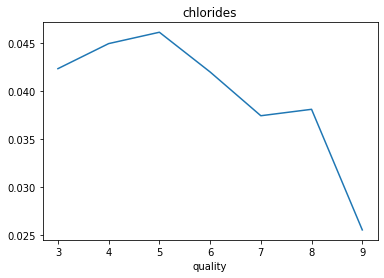

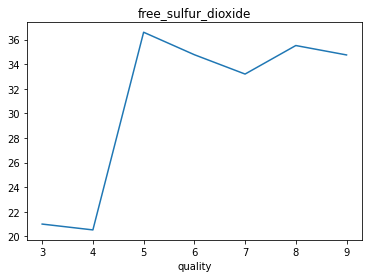

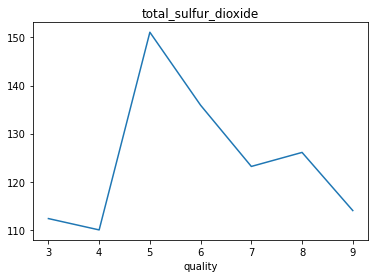

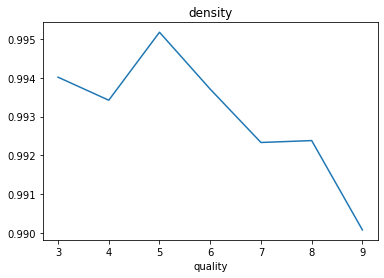

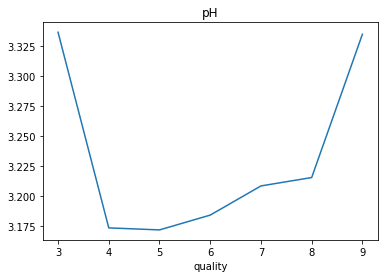

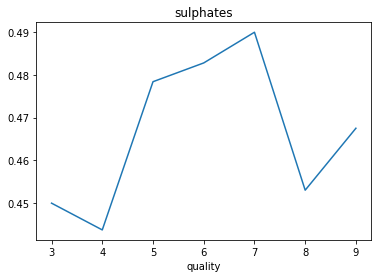

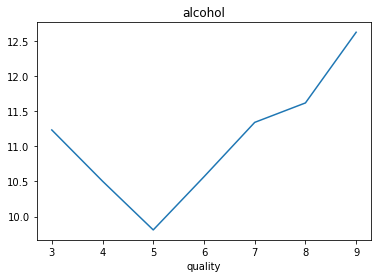

In [18]:
df_per_qual = df.groupby(['quality']).mean() # get a df of the mean of all wines that have a certain quality value
for col in df_per_qual.columns:
    df_per_qual[col].plot()
    plt.title(col)
    plt.show()

### Plotting 3: Pie charts

On a brief tangent, we can plot the number of examples in categorical variables as a pie chart. In this case, we do not have strict categorical variables, but we can for example look at how many wines of each quality value exist.

First, we can numerically quantify the values using the `value_counts` function.

In [19]:
qualities = df['quality'].value_counts()
qualities

6    944
5    589
7    391
8     66
4     40
9      4
3      3
Name: quality, dtype: int64

Then, we can plot these in a pie chart with the `pie` function. `labels=qualities.index` adds labels and `autopct='%.1f%%'` calculates a percentage score automatically and formats it to a number with a single number past the decimal place.

>Q) Why are we using `qualities.head(5)` instead of all quality values? What information do we lose by doing this? How can we re-incorporate this into the plot? (Hint: an 'others' category...)

>Q) How could you make this plot more informative to the viewer?

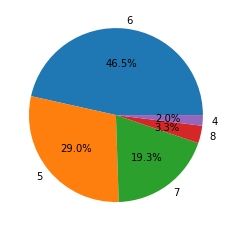

In [20]:
qualities = qualities.head(5)
plt.pie(qualities, labels=qualities.index, autopct='%.1f%%')
plt.show()

### Plotting 4: Histograms: Understand distributions

Since quality isn't a categorical variable, it also makes sense to plot a histogram instead, in order to view the frequency of each value. We get a bell-shaped curve, as we expect in real-world datasets.

> Q) The x-axis tick marks seem to be a bit incorrect. How can we fix this?

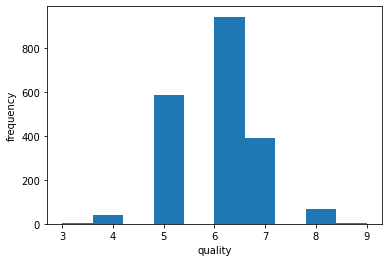

In [22]:
plt.hist(df['quality'])
plt.ylabel("frequency")
plt.xlabel("quality")
plt.show()

It might be better to look at these as probabilities instead of frequencies though, so we normalise with respect to the number of examples we have (we do this automatically using the `density=True` argument). Note that we now have a **probability distribution** and not a frequency chart.

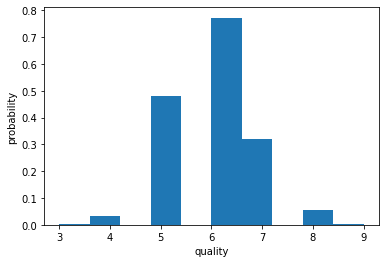

In [24]:
plt.hist(df['quality'], density=True)
plt.ylabel("probability")
plt.xlabel("quality")
plt.show()

### Plotting 5: Scatter plots

Scatter plots may be useful in order to visualize groupings of data points with respect to two or three variables and generally may show us 'point clouds'. This is easily done using matplotlib's `scatter`.

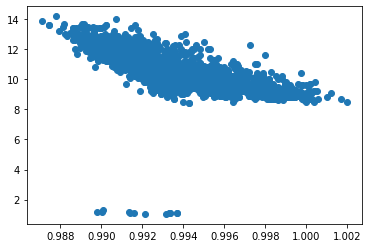

In [25]:
plt.scatter(df['density'], df['alcohol'])

## Outlier Removal

In the above scatterplot, we can see a few points that don't really show the same behaviour as the others -- there are some data points that have their alcohol percentages very low. To better see this, we can create a histogram of just the alcohol percentages.

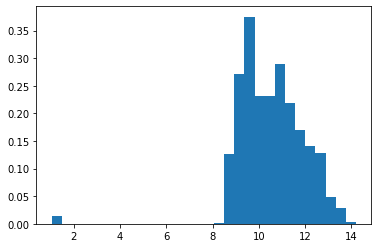

In [26]:
plt.hist(df['alcohol'], density=True, bins=30)
plt.show()

Thus, we see points that are very different than the general trend -- we call these 'outliers'. Note that the term 'outlier' isn't super well defined, and there can be many reasons of them occuring. Wikipedia defines them as: _an outlier is a data point that differs significantly from other observations._ Since they may or may not be problemmatic to our analysis, we may want to remove these from our data set. 

> **Removing outliers without a reason results in bad science.**

What this means, is that if you have what seems to be outlying data points, you must _only_ remove them if you have a good reason to, and if you specifically mention _how_ you removed them. In a real-world dataset, that data point may have nothing wrong with it, but is just an unlikely data point to have attained -- removing it will skew your analysis of the real world. 

If you have data points that are significantly different from the general distribution of the data you already have, you can still remove them **if you mention how many outliers there were and how you removed them**.

> **In all cases, mention how you remove outliers.**

For example, in the case of studying the relationship between alcohol and density, it might be reasonable to assume that we may not wish to analyse wines that do not have _any_ alcohol, thus we can remove these. Additionally, these seem to be quite far away from the rest of the points.


Here, we will learn about the most common outlier detection/removal technique. It assumes the data that you already have is normally distributed. We compute the mean and standard deviation, and we set a threshold with respect to the distance away from mean an outlier must be. For example, if our mean is 10 and standard deviation is 1.5, we may declare our threshold to be twice the standard deviation. Thus, any point is an outlier if it is above $(10+1.5\times2)=13$ or below $(10-1.5\times2)=7$. The exact threshold will depend on your dataset, research question, and your outlier preferences -- it is hard to find this theoretically.

Two benefits (of many) of this method are that you don't need to manually decide outliers, and that you can apply the same threshold on unseen, or new values.   

In [27]:
# calculate mean and std
std = df["alcohol"].std()
mean = df["alcohol"].mean()
mean, std

(10.53399852724595, 1.434766216417804)

In [28]:
# define threshold
threshold = 2*std
# locate and remove outliers
outliers = df.loc[(df['alcohol']<(mean-threshold)) | (df['alcohol']>(mean+threshold))]
df = df.drop(outliers.index)
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 31


We've removed the outlying points! We also need to report the number of outliers, which in this case, is . Re-displaying the histogram and scatter plots also confirms this. 

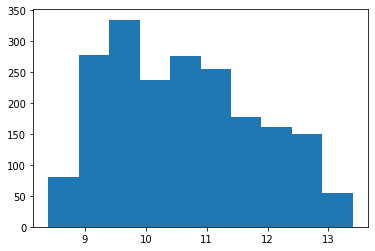

In [29]:
plt.hist(df['alcohol'])
plt.show()

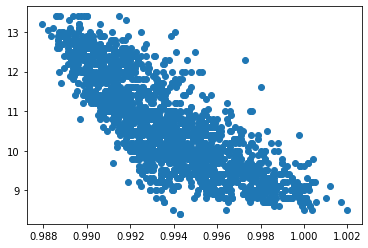

In [30]:
plt.scatter(df['density'], df['alcohol'])
plt.show()

## Line fitting

When we have data, we often wish to find trends in how variables affect one another. When we can parameterise these trends (e.g. as a line or a poynomial), we have a _model_. Modelling is an important aspect of data science (and is one of the main uses of machine learning, which we will get to later). 

In short, the goal is to assume a model type and find 'optimal' model parameters, i.e. those that minimize an error function, for example, least squared errors, on average over all data points in the data set availible to you.

For example, we might assume a linear function $y=ax+b$ to relate alcohol and density. Now, we need to find optimal paramters $a$ and $b$. Knowing these two parameters, we can predict the most likely density of a new, unseen wine, given the alcohol content (or vice versa).

Numpy gives us a function to fit polynomials, called `polyfit`. Setting the degree argument `deg=1` gives us a linear fit, with the outputs a numpy array `[a,b]` for a line $y=ax+b$. We just need to specify the respective $x$ and $y$ parts of each data point.

In [31]:
params = np.polyfit(df['density'], df['alcohol'], deg=1)
params

array([-341.4275656 ,  349.90048363])

We can plot this over the previous scatter plot to visually verify that this works.

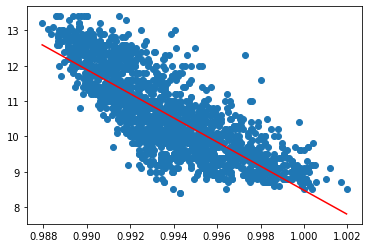

In [32]:
xs = np.linspace(df['density'].min(), df['density'].max(), 1000)
ys = params[0]*xs + params[1]

plt.scatter(df['density'], df['alcohol'])
plt.plot(xs, ys, color="red")

> Q) Would fitting a quadratic polynomial be better in this scenario? Why/why not?

### Polynomial regressions

In the real world, relationships are often not simply linear: for example it may be a quadratic relationship (e.g. the velocity versus aerodynamic drag of an object), a cubic relationship (e.g. the volume of an object versus its length), or something even more complex! Let's take the relationship between pH and quality. We might see something like a quadratic equation:
$$y=ax^2+bx+c$$

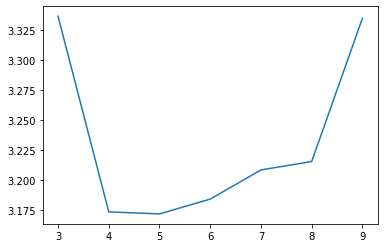

In [33]:
plt.plot(df_per_qual["pH"])

`polyfit` allows us to fit any $n-$degree polynomial and returns a list of coefficients, starting from the highest degree to the lowest:
$$y=c_1x^n+c_2x^{n-1}+...+c_{n-1}x+c_n$$
With the output of the function an array containing the parameters to your model:

$$[c_1, c_2, ..., c_n]$$

Thus, let's fit a quadratic model to this data:



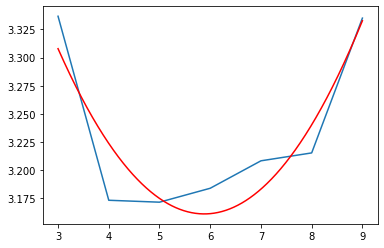

In [34]:
params = np.polyfit(df_per_qual.index, df_per_qual["pH"], deg=2)

xs = np.linspace(df_per_qual.index.min(), df_per_qual.index.max(), 1000)
ys = params[0]*xs**2 + params[1]*xs + params[2]

plt.plot(df_per_qual["pH"])
plt.plot(xs, ys, color="red")

If we plot `volatile_acidity` versus `quality` we see something that looks more like a cubic equation:

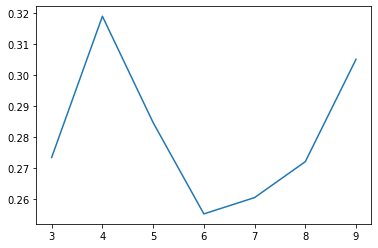

In [35]:
plt.plot(df_per_qual["volatile_acidity"])

Let's fit a cubic model to our data with `polyfit`:

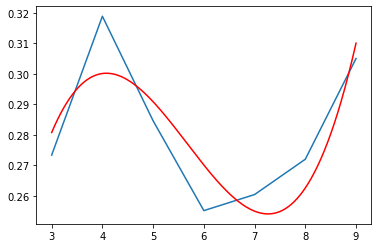

In [36]:
params = np.polyfit(df_per_qual.index, df_per_qual["volatile_acidity"], deg=3)

xs = np.linspace(df_per_qual.index.min(), df_per_qual.index.max(), 1000)
ys = params[0]*xs**3 + params[1]*xs**2 + params[2]*xs + params[3]

plt.plot(df_per_qual["volatile_acidity"])
plt.plot(xs, ys, color="red")

Since the manual function generation (line 4 of the previous code cell), let's automate this for a general $n-$degree polynomial. This is done in the code cell below:

>Q) Why do we reverse the `polyfit` output array in line 6?

> Alternatively, you can use the numpy function `polyval` (look this up!)

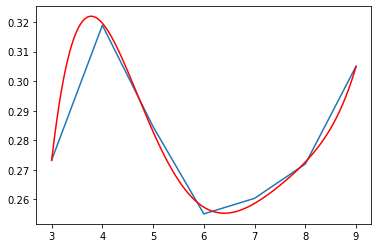

In [38]:
params = np.polyfit(df_per_qual.index, df_per_qual["volatile_acidity"], deg=5)

xs = np.linspace(df_per_qual.index.min(), df_per_qual.index.max(), 1000)
ys = np.zeros(xs.shape)

params = params[::-1]
for i in range(len(params)):
    ys += params[i]*xs**i

plt.plot(df_per_qual["volatile_acidity"])
plt.plot(xs, ys, color="red")

Keep in mind that it is generally unlikelyo to find $10^{th}$-degree polynomial models in the wild -- even though a higher-order polynomial fits the data better than a quadratic one, the latter may be more likely. It is upto you to make hypotheses and observations and justify your results. We will visit this idea more in future lectures.

### Fitting a Gaussian distribution model

When we draw normalised histograms, we may want to fit a bell curve onto it to visualise the 'normality' of our data. This can be done easily, since there are only two parameters to a normal model: the mean and the standard deviation. Thus, we can calculate these easily, and use scipy.stats's `norm.pdf` function ('normal probability density function') to get our resultant curve. Alternatively, you could input values of x into the definition of the normal distribution to get the same result (i.e. $y=N(x|mean, std)$). Thus, we get a histogram and a model of a normal distribution that fits it. We should also visualise this and verify that this is what we expect.

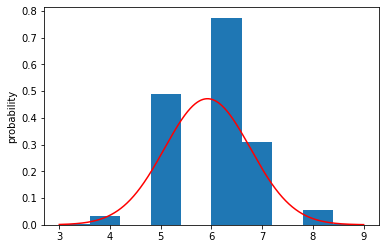

In [39]:
from scipy.stats import norm

mean, std = df['quality'].mean(), df['quality'].std() 

xs = np.linspace(df_per_qual.index.min(), df_per_qual.index.max(), 1000)
ys = norm.pdf(xs, mean, std)

plt.hist(df['quality'], density=True)
plt.ylabel("probability")
plt.plot(xs, ys, color="red")

plt.show()